<a href="https://colab.research.google.com/github/femilgithub/braintumor/blob/main/original_brain_tum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/brain.zip

Archive:  /content/gdrive/MyDrive/brain.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumor_dataset/no/28 no.jp

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import os#find directory
import math
import shutil#move file from one ffolder to another
import glob#we dont need to write the entire path

In [ ]:
#count no of imagees in resspectives classses
#0-brain tumor
#1-healthy
ROOT_DIR="/content/brain_tumor_dataset"
number_of_images={}
#os.listdir-what is preseent in that folder
#list of values present in folders
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()

dict_items([('no', 98), ('yes', 155)])

# we will split data such that
  * 70% for train data
  * 15% for validation
  * 15 % for testing

In [ ]:
#we will create a traing folder
#dont nedd to generate folder all the time'

if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./train/"+dir)
    for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)),size=(math.floor(70/100*number_of_images[dir])-5),replace=False):
      O=os.path.join(ROOT_DIR,dir,img)
      D=os.path.join("./train",dir)
      shutil.copy(O,D)
      os.remove(O)

                                  
else:
  print("the folder exists")

In [ ]:
def dataFolder(p,split):
  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+"/"+dir)
      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)),size=(math.floor(split*number_of_images[dir])-5),replace=False):
        O=os.path.join(ROOT_DIR,dir,img)
        D=os.path.join("./"+p,dir)
        shutil.copy(O,D)
        os.remove(O)

                                  
  else:
    print(f"{p} folder exists")

In [ ]:
dataFolder("train",0.7)

train folder exists


In [ ]:
dataFolder("val",0.15)

In [ ]:
dataFolder("test",0.15)

In [ ]:
number_of_images={}
#os.listdir-what is preseent in that folder
#list of values present in folders
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()

dict_items([('no', 17), ('yes', 16)])

In [ ]:
!pip install keras --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# model building

In [ ]:

#import tensorflow
#from keras.layers.convolutional import Conv2D
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential

from keras.preprocessing.image import ImageDataGenerator
import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array


#from tensorflow.keras.utils import load_img

#from tensorflow.keras.utils import img_to_array

In [ ]:
# cnn model

"""model=Sequential()
model.add(Conv2D(filters= 16, kernal_size=(3,3), activation='relu', input_shape=(224,224,3) ))
model.add(Conv2D(filters=36,kernal_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernal_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernal_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(units=1,activation = 'sigmoid'))

model.summary()"""
model=Sequential()
model.add(Conv2D(filters= 16, kernel_size=(3,3), activation='relu', input_shape=(224,224,3) ))
model.add(Conv2D(filters=36,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(units=1,activation = 'sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

preparing our data using data generater

In [ ]:
def preprocessingImages1(path):
  """
  input:path
  output:pre processed images"""
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
  image = image_data.flow_from_directory(directory = path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [ ]:
path="/content/train"
train_data=preprocessingImages1(path)

Found 166 images belonging to 2 classes.


In [ ]:
def preprocessingImages2(path):
  """
  input:path
  output:pre processed images"""
  image_data=ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory = path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [ ]:
path="/content/val"
val_data=preprocessingImages2(path)

Found 27 images belonging to 2 classes.


In [ ]:
#early stopping and model chekpoints
from keras.callbacks import ModelCheckpoint,EarlyStopping
#early stoppping
es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=6,verbose=1,mode='auto')

#model check point

mc=ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.h5",verbose=1,save_best_only=True,mode='auto')
cd=[es,mc]


Model training

In [ ]:
hs=model.fit_generator(generator=train_data,
                       steps_per_epoch=8,
                       epochs=30,
                       verbose=1,#execution happening need to be displayed
                       validation_data=val_data,
                       validation_steps=16,
                       callbacks=cd
)

Epoch 1/30
6/8 [=====================>........] - ETA: 12s - loss: 0.7371 - accuracy: 0.6265


Epoch 1: val_accuracy improved from -inf to 0.88889, saving model to ./bestmodel.h5
8/8 [==============================] - 53s 5s/step - loss: 0.7371 - accuracy: 0.6265 - val_loss: 0.6314 - val_accuracy: 0.8889


In [ ]:
hs=model.fit_generator(generator=train_data,
                       steps_per_epoch=4,
                       epochs=10,
                       verbose=1,#execution happening need to be displayed
                       validation_data=val_data,
                       validation_steps=8,
                       
)

Epoch 1/10
4/4 [==============================] - ETA: 0s - loss: 0.6267 - accuracy: 0.6719

4/4 [==============================] - 32s 8s/step - loss: 0.6267 - accuracy: 0.6719 - val_loss: 0.4619 - val_accuracy: 0.8148
Epoch 2/10
4/4 [==============================] - 22s 5s/step - loss: 0.5116 - accuracy: 0.7353
Epoch 3/10
4/4 [==============================] - 29s 7s/step - loss: 0.6209 - accuracy: 0.7031
Epoch 4/10
4/4 [==============================] - 23s 7s/step - loss: 0.6095 - accuracy: 0.7255
Epoch 5/10
4/4 [==============================] - 27s 7s/step - loss: 0.5315 - accuracy: 0.7500
Epoch 6/10
4/4 [==============================] - 30s 7s/step - loss: 0.4743 - accuracy: 0.8039
Epoch 7/10
4/4 [==============================] - 31s 8s/step - loss: 0.6629 - accuracy: 0.6562
Epoch 8/10
4/4 [==============================] - 30s 7s/step - loss: 0.5331 - accuracy: 0.7353
Epoch 9/10
4/4 [==============================] - 31s 7s/step - loss: 0.5329 - accuracy: 0.7344
Epoch 10/10
4/4 [==============================] - 28s 6s/step - loss: 0.5309 - accuracy: 0.7647


In [ ]:
h=hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

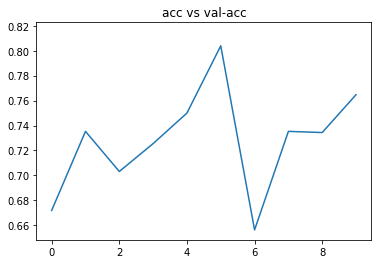

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")

plt.title("acc vs val-acc")
plt.show()

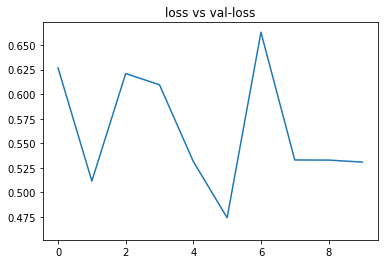

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")

plt.title("loss vs val-loss")
plt.show()

In [ ]:
#model accuracy
from keras.models import load_model
model=load_model("/content/bestmodel.h5")

In [ ]:
# model acuracy

acc=model.evaluate_generator(test_data)[1]
print(f"the accuray of model is{acc*100} %")

the accuray of model is88.88888955116272 %


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [ ]:
path="/content/brain_tumor_dataset/yes/Y115.JPG"
img=load_img(path,target_size=(224,224))
input_arr=img_to_array(img)/255
input_arr.shape
input_arr=np.expand_dims(input_arr,axis=0)
pred=model.predict_classes(input_arr)[0][0]
pred

AttributeError: ignored

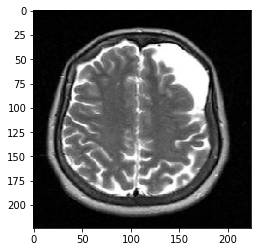

1/1 [==============================] - 0s 86ms/step
the image is having a cancer


In [ ]:
path="/content/brain_tumor_dataset/yes/Y115.JPG"
img=load_img(path,target_size=(224,224))
input_arr=img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr=np.expand_dims(input_arr,axis=0)
pred=model.predict(input_arr)[0]
predicted_class_index = np.argmax(pred)
predicted_class_index

if predicted_class_index==0:
  print("the image is having a cancer")
else:
  print("the image is not having a canceer")

In [ ]:
train_data.class_indices

{'no': 0, 'yes': 1}